In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = r"C:\Users\Sam van Pomeren\Desktop\HWUK\F21DL"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
#Load data
import pandas as pd

def load_wine_data():
    csv_path = os.path.join(r"C:\Users\Sam van Pomeren\Desktop\HWUK\F21DL", "wine.csv")
    return pd.read_csv(csv_path)

 ### Dataset choice explanation
 In the quest for an interesting and meaningfull dataset I was looking around on Kaggle. My eye caught this red wine dataset. At first, wine didn't seem like a very meaningfull dataset, but then I started to think about it a little more. I love drinking wine, and the tasting and trying of new ones may even be my favourite part. I know there are a lot of people in the world who enjoy this as much as I do. However for everyone, every wine tastes different. Besides this there are  thousands of different wines availiable. Knowing taste is a very personal thing, I did want to get some more insight into what contributes to people's judgements on the quality of wine. Therefore this research will take various chemical attributes of 1600 different wines and try to find a correlation between them and the rating the wine has been given by its tasters.

In [3]:
#Print data
wine = load_wine_data()
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about data type per attribute
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#General discription of the data
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


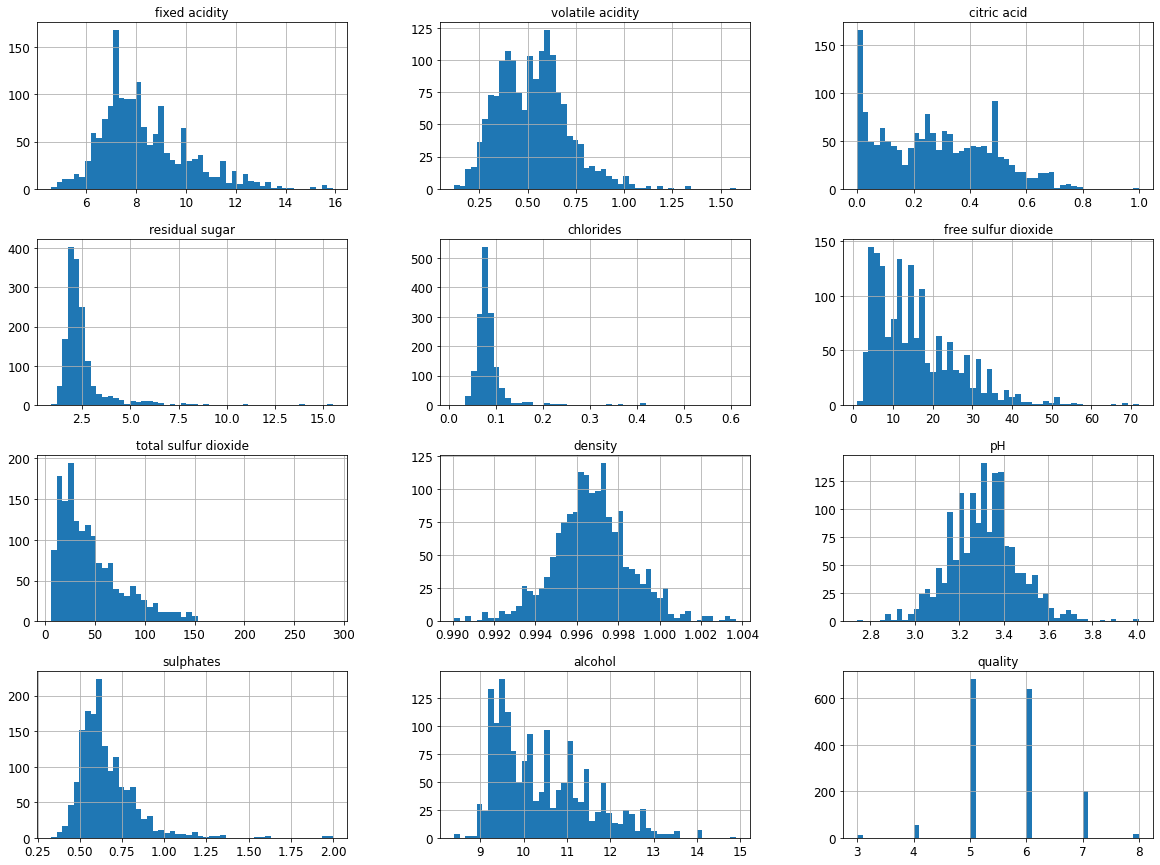

In [6]:
#plot histograms of every attribute
wine.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='chlorides'>,
        <AxesSubplot:xlabel='chlorides', ylabel='chlorides'>,
        <AxesSubplot:xlabel='alcohol', ylabel='chlorides'>,
        <AxesSubplot:xlabel='quality', ylabel='chlorides'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='alcohol'>,
        <AxesSubplot:xlabel='chlorides', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='quality', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>,
        <AxesSubplot:xlabel='chlorides', ylabel='quality'>,
        <AxesSubplot:xlabel='alcohol', ylabel='quality'>,
        <AxesSubplot:xlabel='quality', ylabel='quality'>]], dty

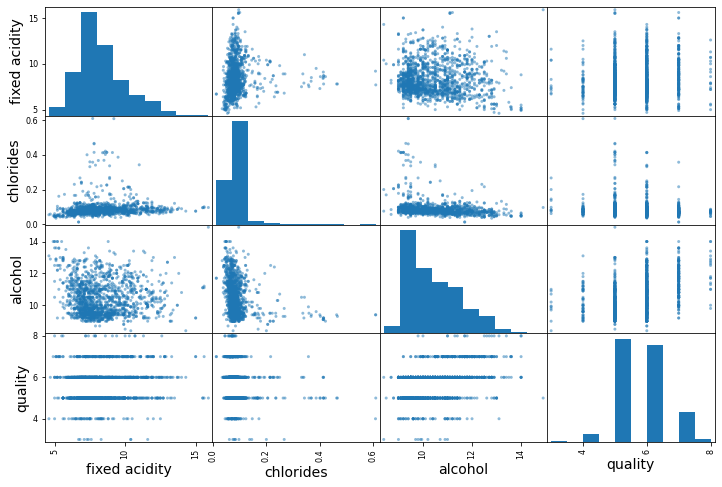

In [7]:
#Put different attributes in scatter diagram to see correlations
from pandas.plotting import scatter_matrix

attributes = ["fixed acidity", "chlorides", "alcohol",
              "quality"]
scatter_matrix(wine[attributes], figsize=(12, 8))

(8.0, 15.0, 4.0, 8.0)

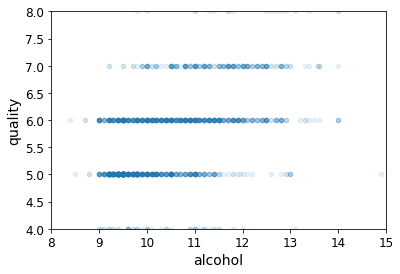

In [8]:
# Print 2 particular attributes in one diagram 
wine.plot(kind="scatter", x="alcohol", y="quality",
             alpha=0.1)
plt.axis([8, 15, 4, 8])

In [9]:
#Create new features (if needed)
#wine["rooms_per_household"] = housing["total_rooms"]/housing["households"]

In [10]:
#Finding correlation between the different attributes
corr_matrix = wine.corr()
abs(corr_matrix["quality"].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide     0.050656
pH                      0.057731
chlorides               0.128907
density                 0.174919
total sulfur dioxide    0.185100
volatile acidity        0.390558
Name: quality, dtype: float64

## Most correlating features to quality

- alcohol
- volatile acidity (-)
- sulphates 
- citric acid
- total sulfur dioxide (-)
- density (-)

## Correlation matrix

                      volatile acidity  citric acid  total sulfur dioxide  \
volatile acidity              1.000000     0.552496              0.076470   
citric acid                   0.552496     1.000000              0.035533   
total sulfur dioxide          0.076470     0.035533              1.000000   
density                       0.022026     0.364947              0.071269   
sulphates                     0.260987     0.312770              0.042947   
alcohol                       0.202288     0.109903              0.205654   

                       density  sulphates   alcohol  
volatile acidity      0.022026   0.260987  0.202288  
citric acid           0.364947   0.312770  0.109903  
total sulfur dioxide  0.071269   0.042947  0.205654  
density               1.000000   0.148506  0.496180  
sulphates             0.148506   1.000000  0.093595  
alcohol               0.496180   0.093595  1.000000  


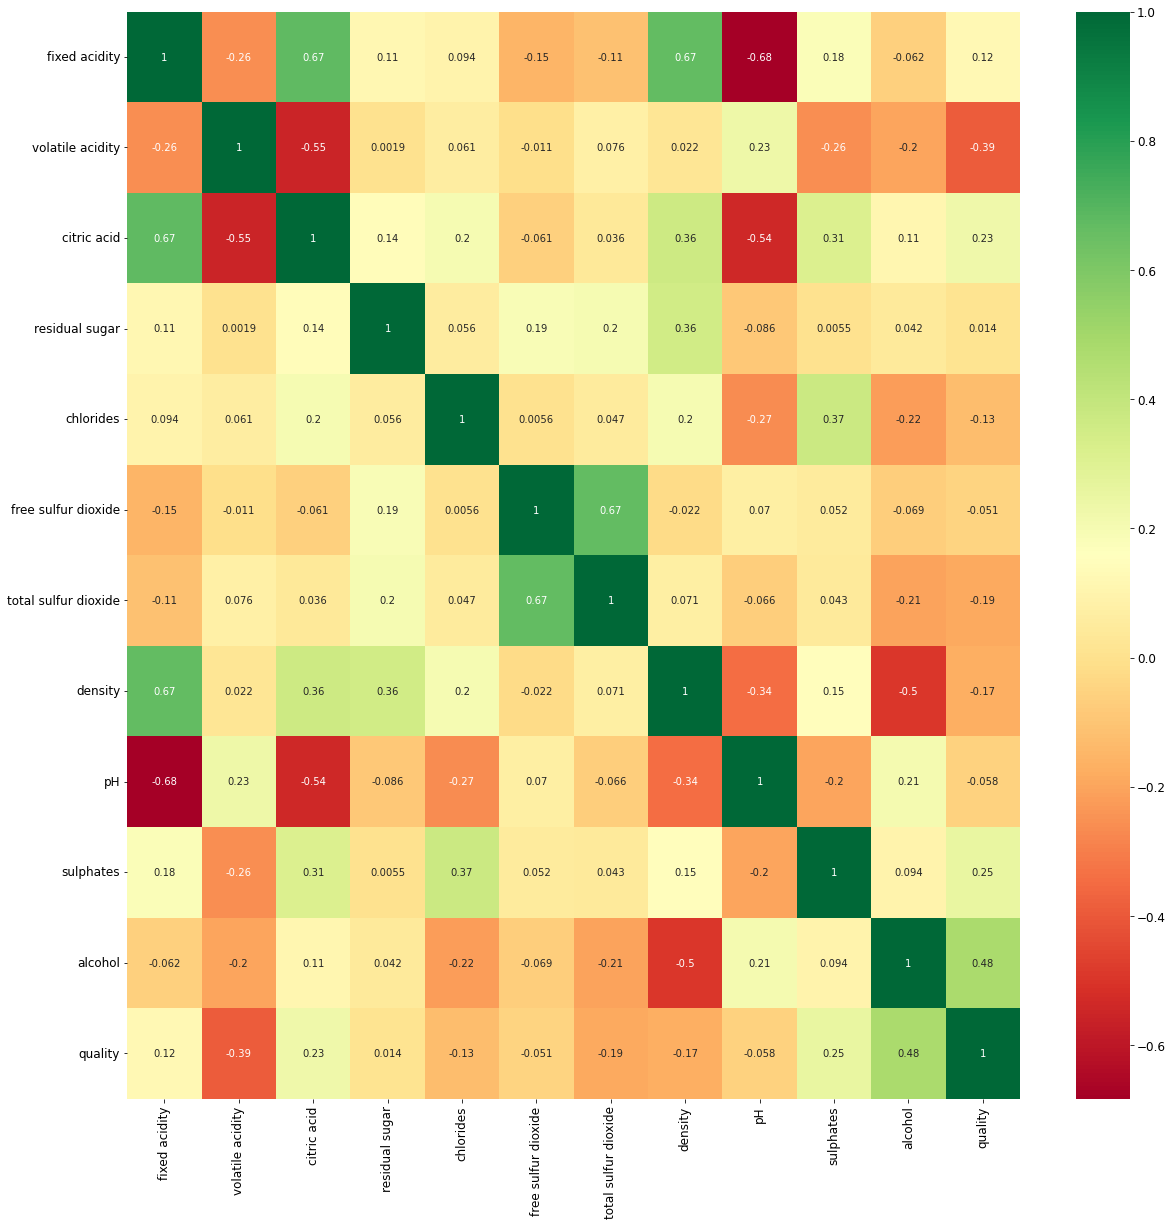

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

X = wine.iloc[:,0:20]  #independent columns
y = wine.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = wine.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(wine[top_corr_features].corr(),annot=True,cmap="RdYlGn")


#Correlation with output variable
cor_target = abs(corrmat["quality"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features


print(abs(wine[["volatile acidity","citric acid","total sulfur dioxide","density","sulphates", "alcohol"]].corr()))
#print(df[["RM","LSTAT"]].corr())

In [12]:
#Find rows with missing values
sample_incomplete_rows = wine[wine.isnull().any(axis=1)].head()
sample_incomplete_rows   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


## Incomplete rows
As can be seen there are no incomplete rows in this dataset, so no missing values have to be handled. The next box shows how this should be done with example data.

In [13]:
# How to handle missing data

# sample_incomplete_rows.dropna(subset=["total_bedrooms"])  #Drop the whole row

# sample_incomplete_rows.drop("total_bedrooms", axis=1)  # Drop whole attribute

# median = housing["total_bedrooms"].median() # Calculate and fill in the median 
# sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

## Scatter matrix with most correlating features

array([[<AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='alcohol'>,
        <AxesSubplot:xlabel='density', ylabel='alcohol'>,
        <AxesSubplot:xlabel='citric acid', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sulphates', ylabel='alcohol'>,
        <AxesSubplot:xlabel='quality', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='density', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='volatile acidity'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='total sulfur dioxide

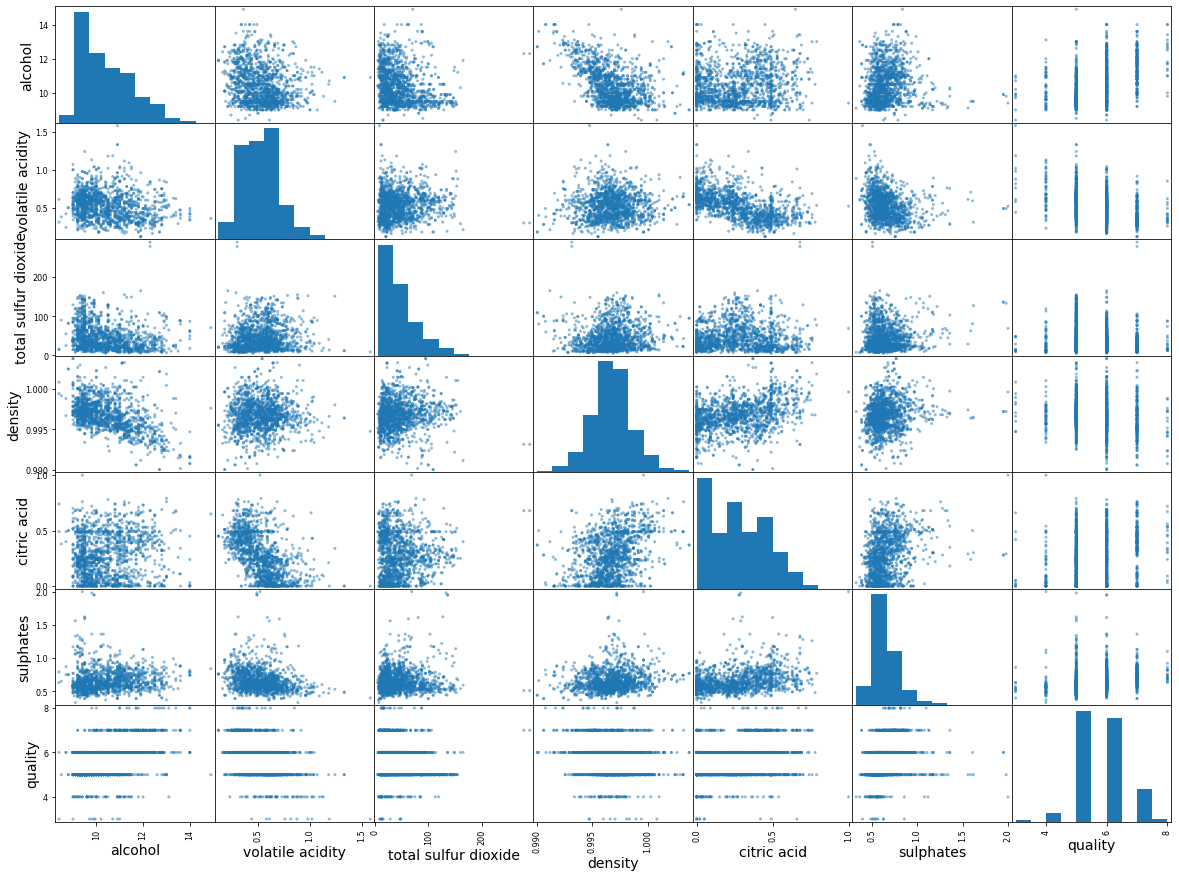

In [14]:
#Put different attributes in scatter diagram to see correlations
from pandas.plotting import scatter_matrix

attributes = ["alcohol", "volatile acidity", "total sulfur dioxide","density", "citric acid", "sulphates", 
              "quality"]
scatter_matrix(wine[attributes], figsize=(20, 15))

## Pre-processing and normalization



In [15]:
#pipeline for preprocessing and normalization

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve


def Scoring(Xin,yin):
    pipe = make_pipeline(
    MinMaxScaler(),
    MultinomialNB()
    )
    
    pipe.fit(Xin, yin)
    Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('NBclassifier', MultinomialNB())])
    
    y_pred1 = pipe.predict(Xin), yin
    y_pred = y_pred1[0]
    
    
    conf_mat = confusion_matrix(yin, y_pred)
    acc_score = accuracy_score(yin, y_pred)
    prec_score = precision_score(pipe.predict(Xin), yin, average=None)
    rec_score = recall_score(pipe.predict(Xin), yin, average=None, zero_division=1)
    F_score = f1_score(yin, y_pred, average=None)
    
    
    
    print(conf_mat)
    print("Accuracy score = ",acc_score)
    print("Precision score = ",prec_score)
    print("Recall score = ",rec_score)
    print("F measure = ",F_score)
    
    #y_scores = cross_val_predict(sgd_clf, X, y_train_6, cv=3,method="decision_function")

    fpr, tpr, thresholds = roc_curve(yin, y_pred)
    
    def plot_roc_curve(fpr, tpr, label=None):
    
        plt.plot(fpr, tpr, linewidth=2, label=label)
        plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
        plt.axis([0, 1, 0, 1])                                    # Not shown in the book
        plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
        plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
        plt.grid(True)                                            # Not shown
 

    plt.figure(figsize=(8, 6))                         # Not shown
    plot_roc_curve(fpr, tpr)
    plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
    plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
    plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
    plt.show()

    roc_auc_score(yin, y_pred)

    # Load the data set
X = wine.iloc[:,0:11]  #independent columns
y = wine["quality"]  

scaler = MinMaxScaler()
scaler.fit(X)
print(scaler.transform(X))
print(confusion_matrix(y, y))


Scoring(X,y)

[[0.24778761 0.39726027 0.         ... 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.         ... 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.04       ... 0.40944882 0.19161677 0.21538462]
 ...
 [0.15044248 0.26712329 0.13       ... 0.53543307 0.25149701 0.4       ]
 [0.11504425 0.35958904 0.12       ... 0.65354331 0.22754491 0.27692308]
 [0.12389381 0.13013699 0.47       ... 0.51181102 0.19760479 0.4       ]]
[[ 10   0   0   0   0   0]
 [  0  53   0   0   0   0]
 [  0   0 681   0   0   0]
 [  0   0   0 638   0   0]
 [  0   0   0   0 199   0]
 [  0   0   0   0   0  18]]
[[  0   0  10   0   0   0]
 [  0   0  45   8   0   0]
 [  0   0 599  82   0   0]
 [  0   0 387 251   0   0]
 [  0   0  45 154   0   0]
 [  0   0   0  18   0   0]]
Accuracy score =  0.5315822388993121
Precision score =  [0.         0.         0.87958884 0.39341693 0.         0.        ]
Recall score =  [1.         1.         0.55156538 0.48927875 1.         1.        ]
F measure =  [0.      

ValueError: multiclass format is not supported

## Form new data set of most correlating features



In [ ]:
# In this section we create three new data set with the features that correlate the most with the quality feature.


X2 = wine.iloc[:,[1, 10, 2]]  #Data set with features alcohol and volatile acidity


X4 = wine.iloc[:,[1, 10, 2, 9, 6]]  #independent columns

X6 = wine.iloc[:,[1, 10, 2, 9, 6, 7, 5]]  #independent columns

X6_test = wine.iloc[:,[10, 9, 6, 7, 5]]  #independent columns

print("left ACTUALLY 3,4,5,6,7,8")
print("top PREDICTED 3,4,5,6,7,8")
# print(X2)
# print(X4)
# print(X6)

Scoring(X2,y)
Scoring(X4,y)
Scoring(X6,y)
Scoring(X6_test,y)


## ROC curve

To be able to get an ROC curve, the algorithm was changed to predict "Six or no-Six" This gave True and False negatives and positives.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve


from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

y_train_6 = (y == 6)

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X, y_train_6)
sgd_clf.predict(X)

print(cross_val_score(sgd_clf, X, y_train_6, cv=3, scoring="accuracy"))

y_train_pred = cross_val_predict(sgd_clf, X, y_train_6, cv=3)
conf_mat_6 = confusion_matrix(y_train_6, y_train_pred)

print(y_train_pred)
print(conf_mat_6)

y_train_perfect_predictions = y_train_6  # pretend we reached perfection
confusion_matrix(y_train_6, y_train_perfect_predictions)

conf_mat = confusion_matrix(y_train_6, y_train_pred)
acc_score = accuracy_score(y_train_6, y_train_pred)
prec_score = precision_score(y_train_6, y_train_pred, average=None)
rec_score = recall_score(y_train_6, y_train_pred, average=None, zero_division=1)
F_score = f1_score(y_train_6, y_train_pred, average=None)
    
    
print(conf_mat)
print("Accuracy score = ",acc_score)
print("Precision score = ",prec_score)
print("Recall score = ",rec_score)
print("F measure = ",F_score)


y_scores = cross_val_predict(sgd_clf, X, y_train_6, cv=3,
                             method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train_6, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

roc_auc_score(y_train_6, y_scores)

## Conclusion

Precision pis the number of correctly classified positive examplesdivided by the total number of examples that are classified as positive. 

Recall ris the number of correctly classified positive examplesdivided by the total number of actual positive examples in the test set. 

The first conclusion that can be made is that this algorithm is not the best algorithm to try and predict this form of data. 
The algorithm did not manage to predict very low or high scores, only midrange. This makes all scores very low.

Precision scores on the 5's were quite high though, so it did recognize a five when it was one. All other scores where affected by the disability to score around 5 and 6. This is also partly because most of the wines were given a 5 or 6 for quality.

Took a while to figure out the TP and FP of this dataset. 

Went for MinMaxnorm to test the algorithm, by the time I had figured everything out and understood all the stept that were taken. I figured the next approach would be better for this type of data set in combination with this algorithm...?

Try binning the data, each feature to low, medium and high. This will defenitely work better with this data. This form of the data will be more usefull in the clustering/neirest neighbour algorithms

The high correlation between some of the features is larger than the correlation with the class. This is not helpful to this algorithm. Chemical features are very often correlated.

To get a ROC curve the algorithm was changed. As can be seen again here the precision in predicting a six is quite high. Though the curve does not show the desired shape.
